In [1]:
#Bring in modules
from bs4 import BeautifulSoup as bs
from splinter import Browser
import requests
import pandas as pd

In [2]:
executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)
url = 'https://www.zomato.com/new-york-city/must-visit-restaurants-in-NYC'
browser.visit(url)

In [3]:
# Retrieve page with the requests module
html = browser.html

In [4]:
# Create BeautifulSoup object; parse with 'html.parser'
soup = bs(html, 'html.parser')

<!DOCTYPE html>
<html lang="en" prefix="og: http://ogp.me/ns#" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta charset="utf-8"/>
  <meta content="origin" name="referrer"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <script src="https://js-agent.newrelic.com/nr-1118.min.js">
  </script>
  <script async="" src="//bat.bing.com/bat.js">
  </script>
  <script async="" src="https://connect.facebook.net/signals/config/1466145233705476?v=2.8.47&amp;r=stable">
  </script>
  <script async="" src="https://connect.facebook.net/en_US/fbevents.js">
  </script>
  <script async="" src="https://www.googletagmanager.com/gtm.js?id=GTM-MKPZQ6">
  </script>
  <script type="text/javascript">
   window.NREUM||(NREUM={}),__nr_require=function(e,n,t){function r(t){if(!n[t]){var o=n[t]={exports:{}};e[t][0].call(o.exports,function(n){var o=e[t][1][n];return r(o||n)},o,o.exports)}return n[t].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o&lt;t.length;o++)r(t[o]);
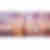

In [5]:
# Examine the results, then determine element that contains sought info
print(soup.prettify())

In [6]:
# Retrieve the parent divs for all the reviews
results = soup.find_all(class_='col-s-8 col-l-1by3')
print(results)

[<div class="col-s-8 col-l-1by3"><div class="h100 pb20"><div class="relative top-res-box entity-ads-snippet-track" data-banner-id="0" data-campaign-id="0" data-entity-id="16775039" data-entity-type="restaurant" data-rating="4.7" data-res-id="16775039" data-res-position="1" data-slot-id="0" data-source="desktop" style="height: 100%;">
<a class="relative lazy top-res-box-bg pl10 ptop0" data-link-type="restaurant" data-original="https://b.zmtcdn.com/data/pictures/9/16775039/424bd518e0f054cfd2745035188e12bd_top_thumb_620_314.jpg?output-format=webp" href="https://www.zomato.com/new-york-city/peter-luger-steak-house-south-side?zrp_bid=0&amp;zrp_pid=14" style="background-size:cover; background-image: url(https://b.zmtcdn.com/images/photo-backs/restaurant-back.jpg?output-format=webp);  height:150px;  display: block; border-radius: 4px; background-position:center;">
<div class="ads-res-snippet-rating-large rating-for-16775039 level-8" data-res-id="16775039">
              4.7
            </div>

In [7]:
#Identify and save the link to the restaurant's details
web_addrs = []
ratings = []
names = []

for result in results:
        details_link = result.find(class_="relative lazy top-res-box-bg pl10 ptop0")
        web_addr = details_link['href']
        web_addrs.append(web_addr)
        
        #Identify and save the restaurant's star rating
        pre_rating = result.find(class_="relative top-res-box entity-ads-snippet-track")
        rating = pre_rating['data-rating']
        ratings.append(rating)
        
        #Identify and save the restaurant name
        pre_name = result.find(class_='res_title zblack bold nowrap')
        name = pre_name['title']
        names.append(name)
        
#Print the data
print(names)
print(ratings)
print(web_addrs)


['Peter Luger Steak House', 'Grand Central Oyster Bar & Restaurant', 'Los Tacos No. 1', "Lombardi's Pizza", 'Russ & Daughters', "Gray's Papaya", 'Blue Ribbon Brasserie', 'Di Fara Pizza', "Katz's Delicatessen", 'Balthazar', "Xi'an Famous Foods", "Bamonte's", 'Minetta Tavern', "Gloria's", 'Marea', 'The Halal Guys', 'Keens Steakhouse', 'Meske Ethiopian Restaurant', 'Morimoto', 'Hometown Bar-B-Que', 'Shake Shack', "Sylvia's Restaurant", 'Gramercy Tavern', 'Le Bernardin']
['4.7', '4.3', '4.4', '4.9', '4.8', '4.5', '4.4', '4.5', '4.9', '4.6', '4.1', '4.0', '4.4', '4.0', '4.2', '4.9', '4.5', '3.6', '4.4', '4.0', '4.9', '4.2', '4.5', '4.7']
['https://www.zomato.com/new-york-city/peter-luger-steak-house-south-side?zrp_bid=0&zrp_pid=14', 'https://www.zomato.com/new-york-city/grand-central-oyster-bar-restaurant-gramercy?zrp_bid=0&zrp_pid=14', 'https://www.zomato.com/new-york-city/los-tacos-no-1-chelsea?zrp_bid=0&zrp_pid=14', 'https://www.zomato.com/new-york-city/lombardis-pizza-lower-east-side?zr

In [8]:
reviews = []
categories =[]
telephones = []
addresses = []

for address in web_addrs:
    
    executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
    browser = Browser('chrome', **executable_path, headless=False)

    #Insert url
    url = address
    browser.visit(url)

    # Retrieve page with the requests module
    html = browser.html

    # Create BeautifulSoup object; parse with 'html.parser'
    soup = bs(html, 'html.parser')

    # Retrieve the parent divs for all the reviews
    results = soup.find_all(class_='row')
   

    #Get reviews, category, telephone, address
    review_count = soup.find(class_='mt2 mb0 rating-votes-div rrw-votes grey-text fontsize5 ta-right').text
    reviews.append(review_count)
    
    category = soup.find(class_="res-info-cuisines clearfix").text
    categories.append(category)
   
    telephone = soup.find(class_= "fontsize2 bold zgreen").text
    telephones.append(telephone)
    
    address = soup.find(class_="resinfo-icon").text
    addresses.append(address)

In [9]:

# Create data frame with created lists
df_nyc = pd.DataFrame({"name":names,
                  "rating":ratings,
                  "address":addresses,
                  "phone_number":telephones,
                  "category":categories,
                  "review_Count":reviews})
df_nyc.head(25)


,name,rating,address,phone_number,category,review_Count
0,Peter Luger Steak House,4.7,"\n178 Broadway, Brooklyn, NY 11211",(718) 387-7400,"Steak, American, German, Burger",1115 votes\n
1,Grand Central Oyster Bar & Restaurant,4.3,"\nGrand Central Terminal, 89 E 42nd Street, Ne...",(212) 490-6650,Seafood,328 votes\n
2,Los Tacos No. 1,4.4,"\n75 9th Avenue, New York, NY 10011",(212) 256-0343,Taco,89 votes\n
3,Lombardi's Pizza,4.9,"\n32 Spring Street, New York, NY 10012",(212) 941-7994,"Pizza, Italian",1468 votes\n
4,Russ & Daughters,4.8,"\n179 E Houston Street, New York, NY 10002",(212) 475-4880,"Seafood, Bagels",252 votes\n
5,Gray's Papaya,4.5,"\n2090 Broadway, NY 10023",(212) 799-0243,"American, Juices, Beverages",499 votes\n
6,Blue Ribbon Brasserie,4.4,"\n97 Sullivan Street, New York, NY 10012",(212) 274-0404,"European, Seafood",462 votes\n
7,Di Fara Pizza,4.5,"\n1424 Avenue J, NY 11230",(718) 258-1367,Pizza,216 votes\n
8,Katz's Delicatessen,4.9,"\n205 East Houston Street, New York, NY 10002",(212) 254-2246,Sandwich,2499 votes\n
9,Balthazar,4.6,"\n80 Spring Street, NY 10012",(212) 965-1414,"French, Seafood, Bakery",1860 votes\n


In [10]:
#clean data
df_nyc['phone_number']=df_nyc['phone_number'].str.replace('(','').str.replace(' ', '').str.replace(')','').str.replace('-','')
df_nyc['review_Count']=df_nyc['review_Count'].str.replace('votes\n','').str.replace('Based on','')
df_nyc['address']=df_nyc['address'].str.replace('\n','')
df_nyc.head()

,name,rating,address,phone_number,category,review_Count
0,Peter Luger Steak House,4.7,"178 Broadway, Brooklyn, NY 11211",7183877400,"Steak, American, German, Burger",1115
1,Grand Central Oyster Bar & Restaurant,4.3,"Grand Central Terminal, 89 E 42nd Street, New ...",2124906650,Seafood,328
2,Los Tacos No. 1,4.4,"75 9th Avenue, New York, NY 10011",2122560343,Taco,89
3,Lombardi's Pizza,4.9,"32 Spring Street, New York, NY 10012",2129417994,"Pizza, Italian",1468
4,Russ & Daughters,4.8,"179 E Houston Street, New York, NY 10002",2124754880,"Seafood, Bagels",252
